# Purchase Decision Tree #
Using an advertising dataset from kaggle, this project will aim to create decision trees and random forest classifier algorithms which will decide whether or not people purchased an item.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("datasets_553985_1008952_Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df["Purchased"].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis ###

Text(0.5, 0, 'Estimated Salary')

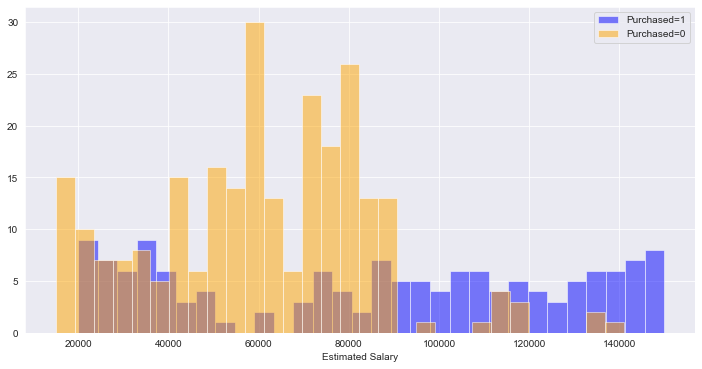

In [6]:
plt.figure(figsize=(12,6))
df[df["Purchased"]==1]["EstimatedSalary"].hist(alpha=0.5,bins=30,color="blue",label="Purchased=1")
df[df["Purchased"]==0]["EstimatedSalary"].hist(alpha=0.5,bins=30,color="orange",label="Purchased=0")
plt.legend()
plt.xlabel("Estimated Salary")

Most purchasers tend to earn more than about 90k. However, there is also some noise between 20k-60k

Text(0.5, 0, 'Age')

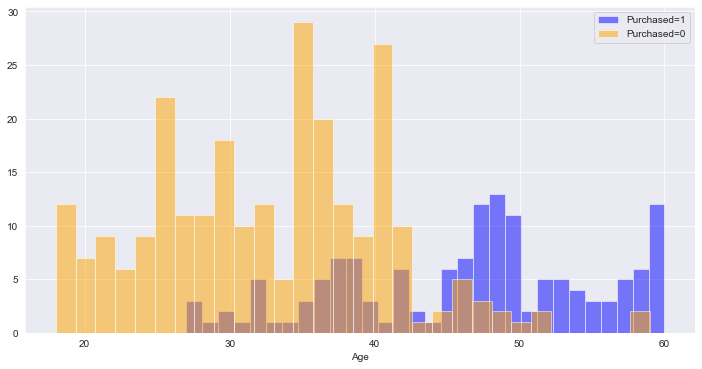

In [7]:
plt.figure(figsize=(12,6))
df[df["Purchased"]==1]["Age"].hist(alpha=0.5,bins=30,color="blue",label="Purchased=1")
df[df["Purchased"]==0]["Age"].hist(alpha=0.5,bins=30,color="orange",label="Purchased=0")
plt.legend()
plt.xlabel("Age")

The majority of purchases tend to be made by people aged over 40

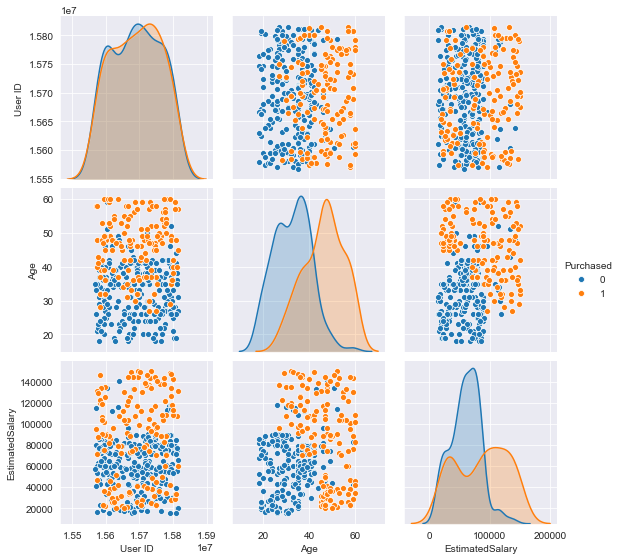

In [8]:
sns.pairplot(df,hue="Purchased")

Before trying to run a machine learning algorithm onto our dataset, we have to convert the string values in the gender columns into Booleans

In [9]:
gender = pd.get_dummies(df["Gender"],drop_first=True)

In [10]:
df.drop("Gender",axis=1,inplace=True)

In [11]:
df = pd.concat([df,gender],axis=1)

In [12]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


### Building a Decision Tree model ###

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop("Purchased",axis=1)
y = df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualising the decision tree ###

In [18]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns)
features.pop(-2)
print(features)

['User ID', 'Age', 'EstimatedSalary', 'Male']


C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


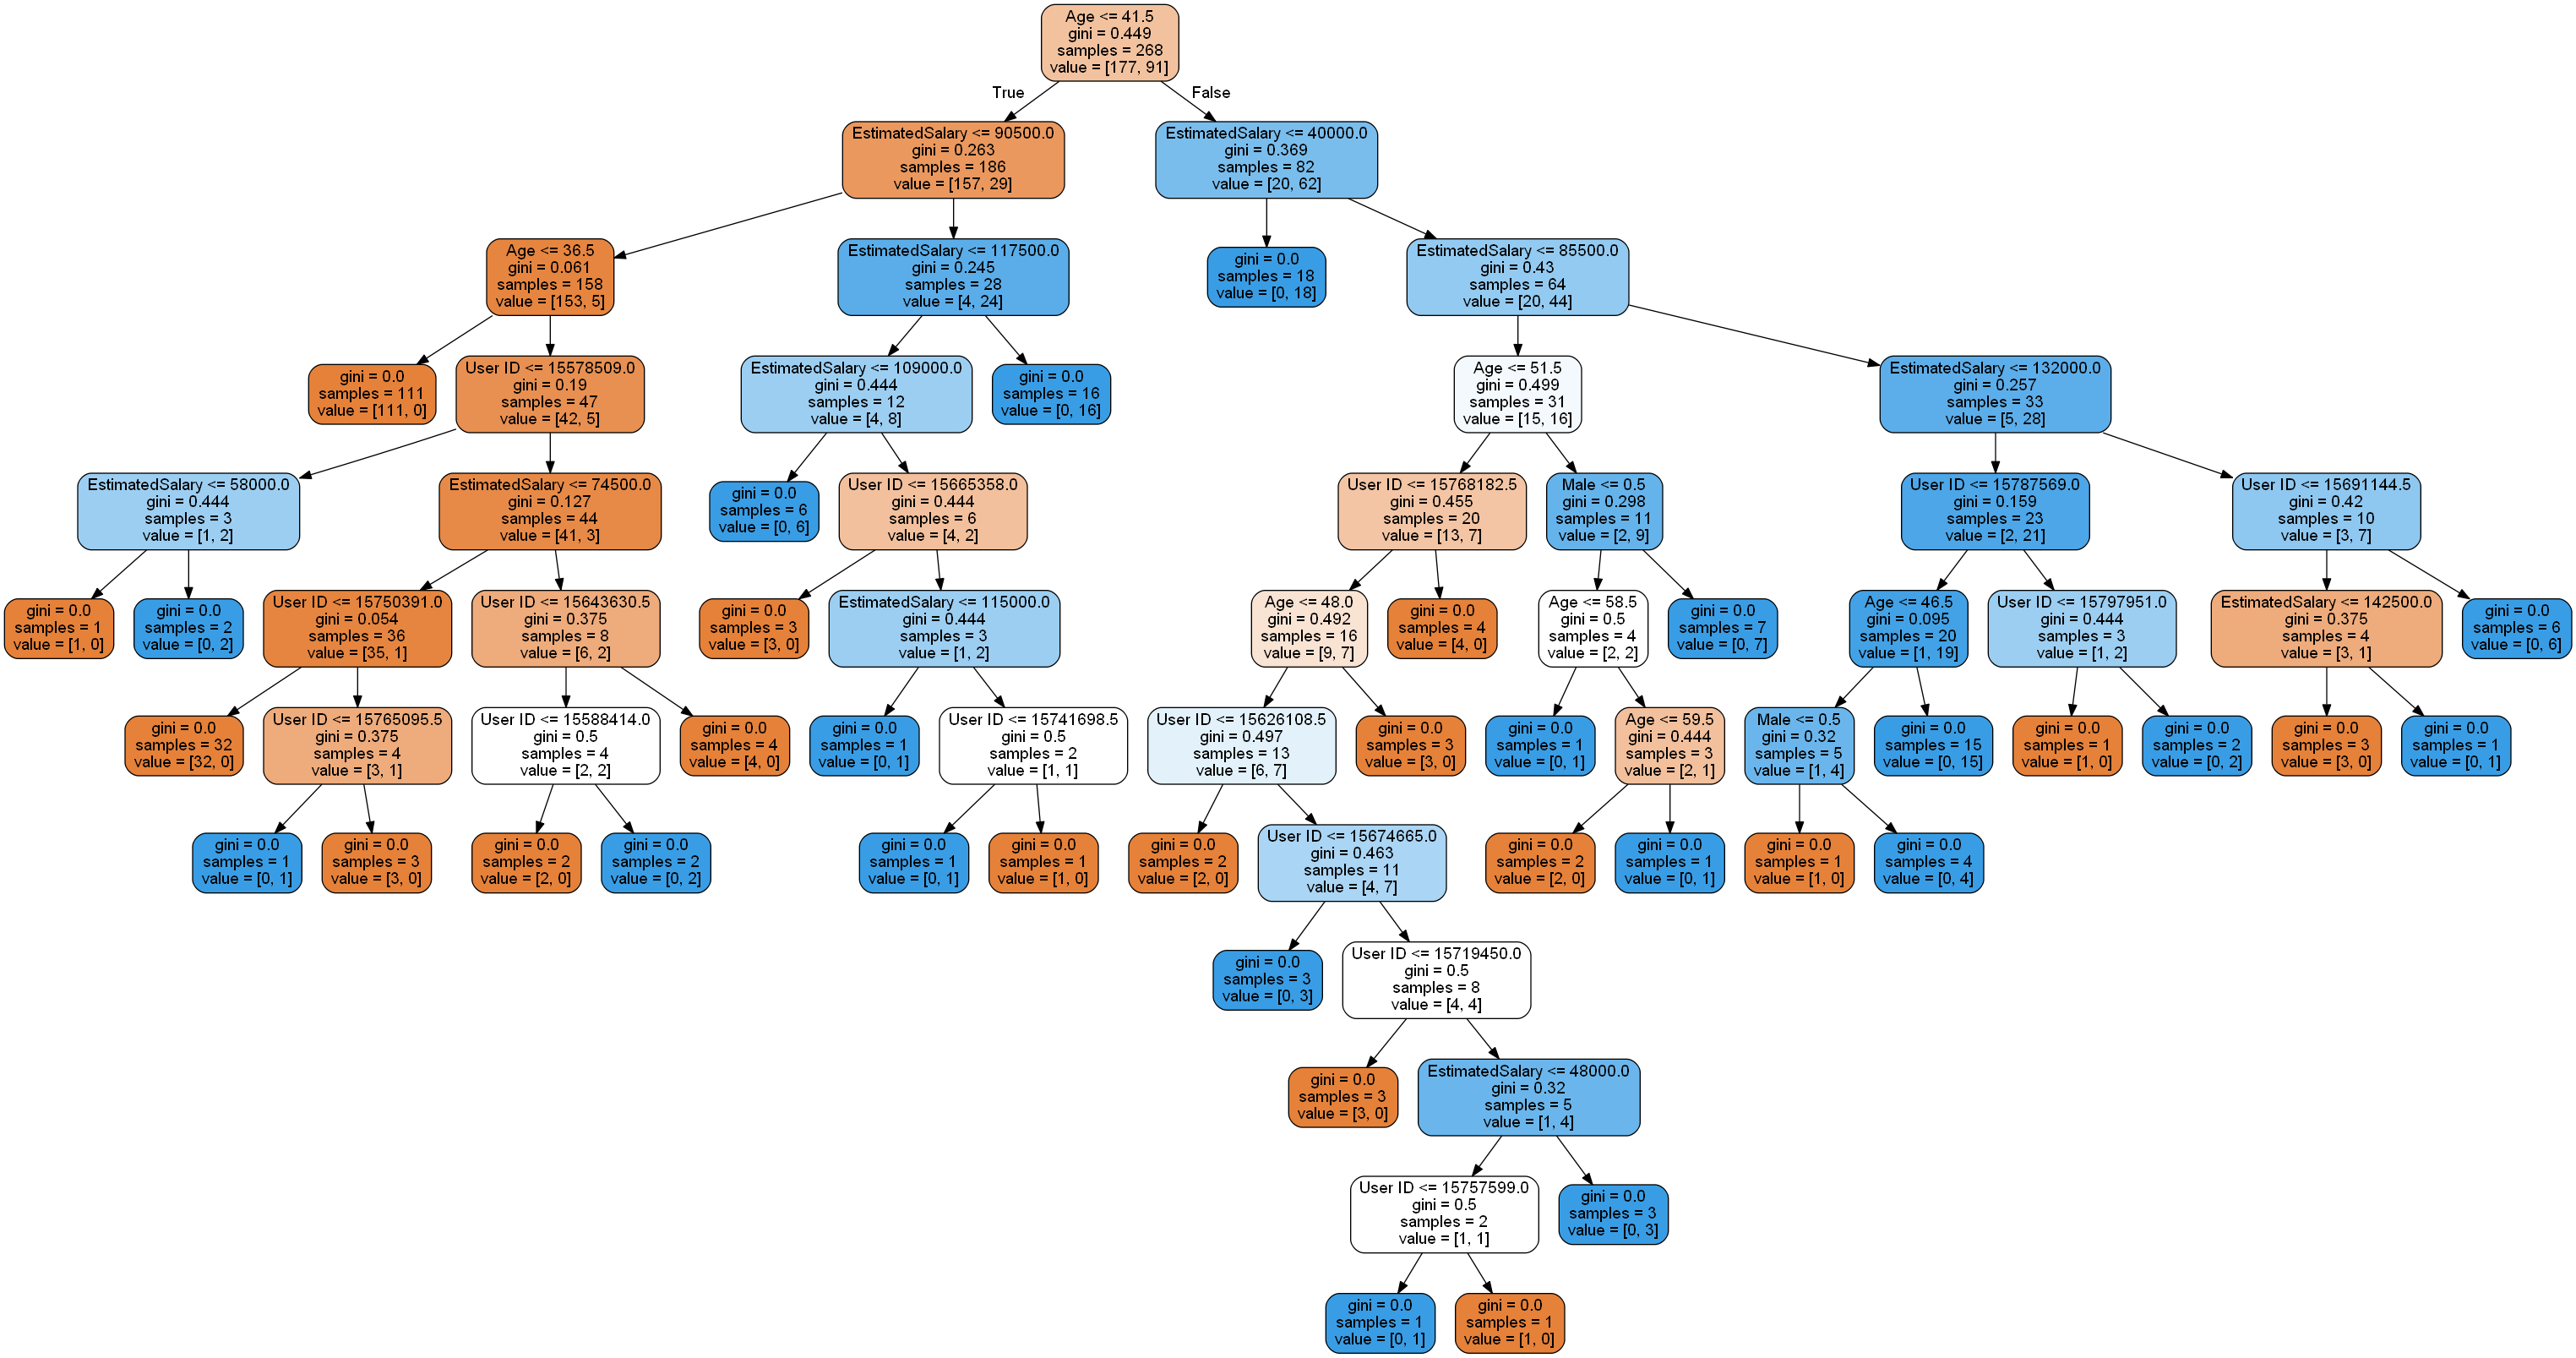

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Evaluating our model ###

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[72  8]
 [ 9 43]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.84      0.83      0.83        52

    accuracy                           0.87       132
   macro avg       0.87      0.86      0.86       132
weighted avg       0.87      0.87      0.87       132



This models performance isn't too bad, let's see if a random forest performs better on this dataset.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=100)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[74  6]
 [ 4 48]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       0.89      0.92      0.91        52

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.93      0.92      0.92       132



<div class="alert-success" >
The random forest model performed with 5% improved accuracy!